# Scraping Images

## Introduction

You've definitely started to hone your skills at scraping now! With that, let's look at another data format you're apt to want to pull from the web: images! In this lesson, you'll see how to save images from the web as well as display them in a Pandas DataFrame for easy perusal!

## Objectives

You will be able to:

* Select specific elements from HTML using Beautiful Soup
* Identify and scrape images from a web page

## Grabbing an HTML Page

Start with the same page that you've been working with: books.toscrape.com.

<img src="images/book-section.png">

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
html_page = requests.get('http://books.toscrape.com/') # Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing
warning = soup.find('div', class_="alert alert-warning")
book_container = warning.nextSibling.nextSibling

## Finding Images

First, simply retrieve a list of images by searching for `img` tags with beautiful soup:

In [3]:
images = book_container.findAll('img')
ex_img = images[0] # Preview an entry
ex_img

<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [4]:
# Use tab complete to preview what types of methods are available for the entry
# ex_img.

In [5]:
# While there's plenty of other methods to explore, simply select the url for the image for now.
ex_img.attrs['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

## Saving Images

Great! Now that you have a URL (well, a URL extension to be more precise) you can download the image locally!

In [6]:
import shutil

In [7]:
url_base = "http://books.toscrape.com/"
url_ext = ex_img.attrs['src']
full_url = url_base + url_ext
r = requests.get(full_url, stream=True)
if r.status_code == 200:
    with open("images/book1.jpg", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

## Showing Images in the File Directory

You can also run a simple bash command in a standalone cell to preview that the image is indeed there:

In [8]:
ls images/

book-section.png  book14.jpg        book2.jpg         book7.jpg
book1.jpg         book15.jpg        book20.jpg        book8.jpg
book10.jpg        book16.jpg        book3.jpg         book9.jpg
book11.jpg        book17.jpg        book4.jpg
book12.jpg        book18.jpg        book5.jpg
book13.jpg        book19.jpg        book6.jpg


## Previewing an Individual Image

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

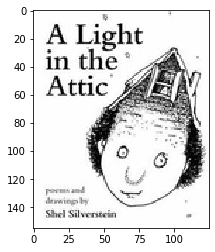

In [10]:
img = mpimg.imread('images/book1.jpg')
imgplot = plt.imshow(img)
plt.show()

## Displaying Images in Pandas DataFrames

You can even display images within a pandas DataFrame by using a little HTML yourself!

In [11]:
import pandas as pd
from IPython.display import Image, HTML

In [12]:
row1 = [ex_img.attrs['alt'], '<img src="images/book1.jpg"/>']
df = pd.DataFrame(row1).transpose()
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

,title,cover
0,A Light in the Attic,


## All Together Now

In [13]:
data = []
for n, img in enumerate(images):
    url_base = "http://books.toscrape.com/"
    url_ext = img.attrs['src']
    full_url = url_base + url_ext
    r = requests.get(full_url, stream=True)
    path = "images/book{}.jpg".format(n+1)
    title = img.attrs['alt']
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        row = [title, '<img src="{}"/>'.format(path)]
        data.append(row)
df = pd.DataFrame(data)
print('Number of rows: ', len(df))
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))   

Number of rows:  20


,title,cover
0,A Light in the Attic,
1,Tipping the Velvet,
2,Soumission,
3,Sharp Objects,
4,Sapiens: A Brief History of Humankind,
5,The Requiem Red,
6,The Dirty Little Secrets of Getting Your Dream Job,
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,
9,The Black Maria,


## Summary

Voila! You now know how to use your knowledge of HTML and Beautiful Soup to scrape images. You really are turning into a scraping champion! Now, go get scraping!